
## Shahwaiz Bukhari
----
## Goal

Your goal in this assigment is to implement a Decision Tree Classifier.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

### Decision Tree Classifier

Now in this assignment we will be implementing the Decision Classifier for both Continuous and Categorical attributes.

You will be testing your implementations with three different split criterias, namely:
 - Information Gain
 - Gini Index
 - CART 


In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
import copy

Populating the interactive namespace from numpy and matplotlib


In [2]:
class Node:
    def __init__(self,purity,klasslabel='',score=0,split=[],fidx=-1):
        self.lchild=None       
        self.rchild=None
        self.klasslabel=klasslabel        
        self.split=split
        self.score=score
        self.fidx=fidx
        self.purity=purity
        
    def set_childs(self,lchild,rchild):
        # YOUR CODE HERE
        self.lchild=lchild
        self.rchild=rchild
        #raise NotImplementedError()
    def isleaf(self):
        # YOUR CODE HERE
        #if leaf returns True else False
        if(self.lchild is  None and self.rchild is  None):
            return True
        else:
            return False
        #raise NotImplementedError()
    def isless_than_eq(self, X):
        # YOUR CODE HERE
        raise NotImplementedError()
    def get_str(self):        
        if self.isleaf():
            return 'C(class={},Purity={})'.format(self.klasslabel,self.purity)
        else:
            return 'I(Fidx={},Score={},Split={})'.format(self.fidx,self.score,self.split)
    

In [3]:
# A placeholder class 
# TODO: You have to implement the following class, remember from the lectures that you will 
# need to build a model for each different class you are trying to identify...

In [4]:
np.random.randint(10,20)

19

In [5]:
import pdb
## Your code goes here...
# You might need to define auxliary classes for composition.. ?
class DecisionTree:
    ''' Implements the Decision Tree For Classification... '''
    def __init__(self, purityp, exthreshold,maxdepth=10):        
        self.purity=purityp
        self.exthreshold=exthreshold
        self.maxdepth=maxdepth
        ###__init__(self,purity,klasslabel='',score=0,split=[],fidx=-1)
        #node=None
        self.root=None
        pass
    def train(self, X, Y):
        ''' Train Decision Tree using the given 
            X [m x d] data matrix and Y labels matrix
            
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            
            Returns:
            -----------
            Nothing
            '''
        nexamples,nfeatures=X.shape
        ## now go and train a model for each class...
        # YOUR CODE HERE
        #Xc=copy.copy(X)
        #Yc=copy.copy(Y)
        
        #print "X.shape::" ,X.shape
        
        idx=range(X.shape[0])
        np.random.shuffle(idx)
        
        if(nexamples>1):
                untill=int(nexamples*.70)
        else:
                untill=nexamples
                
        #print "nexamples:",nexamples
        #print "untill:",untill
            
        Xt=X[0:untill]
        Yt=Y[0:untill]
            
            #print X
            #print Y
            
        Xt=X[idx]
        Yt=Y[idx]
                
        
        self.build_tree(Xt,Yt)
        return 
      
    def build_tree( self,X, Y, depth=10,currNode=None):
            nexamples, nfeatures=X.shape
            ###intro the shuffle
            #idx=range(Xt.shape[0])
            #np.random.shuffle(idx)
    
            #Xt=Xt[idx]
            #Yt=Yt[idx]
            """
            if(nexamples>1):
                untill=int(nexamples*.70)
            else:
                untill=nexamples
                
            print "nexamples:",nexamples
            print "untill:",untill
            
            X=Xt[0:untill]
            Y=Yt[0:untill]
            
            #print X
            #print Y
            
            """
            """ 
                Function is used to recursively build the decision Tree 

                Input
                -----
                X: [m x d] a data matrix of m d-dimensional examples.
                Y: [m x 1] a label vector.

                Returns
                -------
                root node of the built tree...
            """
            #nexamples, nfeatures=X.shape
            klasses=np.unique(Y);
            # YOUR CODE HERE
            #--------calculating purity-------#    
            p_arr=[]
            argmax_flag=False
            for i in klasses:
                    p_arr.append( X[Y==i].shape[0])
            #------------getting the max purity-----------#
            p_idx=np.argmax(p_arr)
            purityD=p_arr[p_idx]/float(nexamples)
            
        
            # or  self.find_depth()>6
            if (nexamples<=self.exthreshold or purityD>=self.purity or self.find_depth()>6):
                currNode.purity=purityD
                currNode.klasslabel=klasses[p_idx]
       
                currNode.lchild=None
                currNode.rchild=None
                return self.root    
            split_point=0.0
            score=100
            
            Xlidx=[]
            Xridx=[]
            bestFeat=-1
            
            X=X.T
            
            
            
            nfeat=int(X.shape[0]**1/2)
            
            iterm=np.random.randint(0,X.shape[0]-1,nfeat)
            #print "iterm::",iterm 
            for feat in iterm:
                #def evaluate_numerical_attribute(self,feat, Y)
                #returns split,mingain,Xlidx,Xridx
                #print "feat:",feat
                split,mingain_score,tmpXlidx,tmpXridx = self.evaluate_numerical_attribute(X[feat], Y)
                if(mingain_score < score):    
                    split_point=split
                    score=mingain_score
                    Xlidx=tmpXlidx
                    Xridx=tmpXridx
                    bestFeat=feat
            
            """
            
            feat=np.random.randint(0,X.shape[0])
            split,mingain_score,tmpXlidx,tmpXridx = self.evaluate_numerical_attribute(X[feat], Y)
            if(mingain_score < score):    
                    split_point=split
                    score=mingain_score
                    Xlidx=tmpXlidx
                    Xridx=tmpXridx
                    bestFeat=feat
            
            """
            ###now we have the best split point for best feature
            ###split the X into two parts Dy and Dn on basis of split point
            ###Book:// partition D into DY and DN using split point∗, and call recursively 
            
            DY_exp=X.T[ Xlidx ]
            DN_exp=X.T[ Xridx ]
            Y_l=Y[ Xlidx ]
            Y_r=Y[ Xridx ]
            ###***********************************************************###
            #################################################################
            ###def __init__(self,purity,klasslabel='',score=0,split=[],fidx=-1):
            
            split_store=[ bestFeat,split_point]
            if(self.root==None):
                
                self.root=Node(purityD,'',score,split_store,-1)
                self.root.lchild=Node(-1,'noclass',-1,[-1,-1],-1)
                self.root.rchild=Node(-1,'noclass',-1,[-1,-1],-1)
                
                self.build_tree(DY_exp,Y_l,10,self.root.lchild)
                self.build_tree(DN_exp,Y_r,10,self.root.rchild)
                
            else:
                
                currNode.purity=purityD
                currNode.klasslabel=''
                currNode.score=score
                currNode.split=split_store
                currNode.fidx=-1
                
                
                currNode.lchild=Node(-1,'noclass',-1,[-1,-1],-1)
                currNode.rchild=Node(-1,'noclass',-1,[-1,-1],-1)
                
                self.build_tree(DY_exp,Y_l,10,currNode.lchild)
                self.build_tree(DN_exp,Y_r,10,currNode.rchild)
                
            ###now make a recursive call for both left and right part 
            ###def build_tree(self, X, Y, depth) return RootNode
            #################################################################
    def test(self, X):
        
        ''' Test the trained classifiers on the given set of examples 
        
                   
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional test examples.
           
            Returns:
            -----------
                pclass: the predicted class for each example, i.e. to which it belongs
        '''
        
        nexamples, nfeatures=X.shape
        pclasses=self.predict(X)
        
        # your code go here...
        
        return np.array(pclasses)
    ###########INfo.Gain function########
    c    #####################################
    def evaluate_numerical_attribute(self,feat, Y):
        '''
            Evaluates the numerical attribute for all possible split points for
            possible feature selection
            
            Input:
            ---------
            feat: a contiuous feature
            Y: labels
            
            Returns:
            ----------
            v: splitting threshold
            score: splitting score
            Xlidx: Index of examples belonging to left child node
            Xridx: Index of examples belonging to right child node
            
        '''
        
        
        
        # A big source of Bugs will be sorting the same array and expecting it to behave original,
        # use separate variables to store the sorted array and its corresponding classes labels...
        classes=np.unique(Y)
        nclasses=len(classes)
        sidx=np.argsort(feat)
        f=feat[sidx] # sorted features
        sY=Y[sidx] # sorted features class labels...
        
        # YOUR CODE HERE
        ###caculating the midpoints
        Mids_all=np.array([])
        
        #print "f.shape[0]:",f.shape[0]
        
        for i in range(f.shape[0]-1):
            if(f[i]!=f[i+1]):
                Mids_all=np.append( Mids_all ,( f[i]+f[i+1] ) / 2.0 )
                
        idx_r=Mids_all.shape[0]-1
        
        #print "idx_r:",idx_r 
        
        if(idx_r>11):
            idx=np.random.randint(0,idx_r,10 )
            Mids=Mids_all[idx]
            #print "idx:",idx
        
        else:
            #idx=np.random.randint(0,idx_r,idx_r )
            Mids=Mids_all        
        #idx=np.append( idx , Mids_all[idx_r] )
        
        ###now evaluate at each mid point the best split score
        ###and save the midPoint for best split point
        ###make and array of shape (feat.shape[0]*no_of_kclasses)
        count_arr = [] 
        for mid in Mids:
            tmp_arr=np.array([])
            for klass in classes:    
                tmp_arr=np.append( tmp_arr , f[f[sY==klass]<=mid].shape[0] )
            count_arr.append(tmp_arr)
        count_arr=np.array(count_arr)    
        ########################################################
        ###now we will calculate the score at each split
        ###and split point which gives the max score we will store it                       
        split = 0.0
        mingain_score = 1000
        tot_counts=count_arr[count_arr.shape[0]-1]
        for i in range(0,count_arr.shape[0]):
                score=self.gain(count_arr[i],tot_counts)
                if(score<mingain_score):
                               split = Mids[i]
                               mingain_score = score                                   
        Xlidx=f <= split  
        Xridx=f > split               
        return split,mingain_score,Xlidx,Xridx
    def predict(self, X):
        
        """
        Test the trained classifiers on the given example X
        
                   
            Input:
            ------
            X: [1 x d] a d-dimensional test example.
           
            Returns:
            -----------
                pclass: the predicted class for the given example, i.e. to which it belongs
        """
        z=[]
        
        for idx in range(X.shape[0]):
            tmp=self._predict(self.root,X[idx,:])
            z.append(tmp)
        
        return z 
    
    def _predict(self,node, X):
        
        # YOUR CODE HERE
        ############################################
        ###**************************************###
        ###we have root as node in input
        ###so make a base case
        ###and a recursive case
        ###
        
        #def __init__(self,purity,klasslabel='',score=0,split=[],fidx=-1):
        ###
        if( node.lchild == None and node.rchild == None):
            return node.klasslabel
        else:
            bFeat=node.split[0]
            val=node.split[1]
            if( X[bFeat] <= val):
                return self._predict(node.lchild,X)
            else:
                return self._predict(node.rchild,X)
        
        ###**************************************###
        ############################################
        
    def __str__(self):
        print "HERE"
        return self.__print(self.root)        
        
     
    def find_depth(self):
        return self._find_depth(self.root)
    
    
    def _find_depth(self,node):
        if not node:
            return
        if node.isleaf():
            return 1
        else:
            return max(self._find_depth(node.lchild),self._find_depth(node.rchild))+1
    def __print(self,node,depth=0):
        ret = ""

        # Print right branch
        if node.rchild:
            ret += self.__print(node.rchild,depth+1)

        # Print own value
        
        ret += "\n" + ("    "*depth) + node.get_str()

        # Print left branch
        if node.lchild:
            ret += self.__print(node.lchild,depth+1)
        
        return ret

In [74]:

from nose.tools import assert_greater_equal
cnt=0
arr=[]
for i in range(10):
    feat=[0,1,2,3]
    dt=DecisionTree(0.70,5)

    #for i in range(100):
    dt.train(Xtrain[:,feat],Ytrain)

    pclasses=dt.predict(Xtest[:,feat])
    acc = np.sum(pclasses==Ytest)/float(Ytest.shape[0])
    arr.append(acc)
    if(acc>.52):
        cnt+=1
        print "yes"
print acc
print cnt
#assert_greater_equal(acc, 0.90)

C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 104 but corresponding boolean dimension is 34
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 104 but corresponding boolean dimension is 70
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 24 but corresponding boolean dimension is 12
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7 but corresponding boolean dimension is 3
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
0.666666666667
10


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 29 but corresponding boolean dimension is 12
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 29 but corresponding boolean dimension is 17
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 6
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 8
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not matc

In [85]:
print acc
print cnt
print arr

0.666666666667
10
[0.75555555555555554, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.68888888888888888, 0.77777777777777779, 0.66666666666666663, 0.68888888888888888, 0.66666666666666663]


In [56]:
print len(Y)
feat=[0,1]
dt=DecisionTree(0.95,5,2)
feat=[0,1]
dt.classes=np.unique(Y)
dt.nclasses=len(np.unique(Y))
split,mingain,Xlidx,Xridx=dt.evaluate_numerical_attribute(X[:,0],Y)
print split,mingain
# You should get following result:, see the example on book page 490-491, Data Mining and Analysis...
# Split=5.45, H(DY)=0.577004250316,P(DY)=0.342281879195,H(DN)=0.290715865467,P(DN)=0.657718120805,gain=0.388707191825

149
5.35 0.69680962033


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 149 but corresponding boolean dimension is 49
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 149 but corresponding boolean dimension is 100


In [10]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

In [48]:
#load the data set
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [49]:
# Get your data in matrix
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape   
#Data Set Dimensions= (149, 4)  True Class labels dimensions (149,)

 Data Set Dimensions= (149L, 4L)  True Class labels dimensions (149L,)


In [50]:
print Y

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

In [51]:
Y[Y=='Iris-virginica']='Iris-versicolor'
print Y, len(Y), np.unique(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

### Debugging Tip
You can import pdb and call its function set_trace (i.e pdb.set_trace()) any where in your code to stop the execution of your code and inspect it line by line by using pdf. Otherwise, you can use Pycharm GUI debugger.

In [15]:

# import pdb 
# pdb.set_trace()

In [16]:
np.sum((X[:,0]<=5.45) & (Y=='Iris-versicolor'))
#7

7

In [17]:
print ['{:0.5}'.format(p) for p in X[:,0]]

['4.9', '4.7', '4.6', '5.0', '5.4', '4.6', '5.0', '4.4', '4.9', '5.4', '4.8', '4.8', '4.3', '5.8', '5.7', '5.4', '5.1', '5.7', '5.1', '5.4', '5.1', '4.6', '5.1', '4.8', '5.0', '5.0', '5.2', '5.2', '4.7', '4.8', '5.4', '5.2', '5.5', '4.9', '5.0', '5.5', '4.9', '4.4', '5.1', '5.0', '4.5', '4.4', '5.0', '5.1', '4.8', '5.1', '4.6', '5.3', '5.0', '7.0', '6.4', '6.9', '5.5', '6.5', '5.7', '6.3', '4.9', '6.6', '5.2', '5.0', '5.9', '6.0', '6.1', '5.6', '6.7', '5.6', '5.8', '6.2', '5.6', '5.9', '6.1', '6.3', '6.1', '6.4', '6.6', '6.8', '6.7', '6.0', '5.7', '5.5', '5.5', '5.8', '6.0', '5.4', '6.0', '6.7', '6.3', '5.6', '5.5', '5.5', '6.1', '5.8', '5.0', '5.6', '5.7', '5.7', '6.2', '5.1', '5.7', '6.3', '5.8', '7.1', '6.3', '6.5', '7.6', '4.9', '7.3', '6.7', '7.2', '6.5', '6.4', '6.8', '5.7', '5.8', '6.4', '6.5', '7.7', '7.7', '6.0', '6.9', '5.6', '7.7', '6.3', '6.7', '7.2', '6.2', '6.1', '6.4', '7.2', '7.4', '7.9', '6.4', '6.3', '6.1', '7.7', '6.3', '6.4', '6.0', '6.9', '6.7', '6.9', '5.8', '6.8'

In [18]:
print X[:,0].shape[0]

149


In [19]:
print len(Y)
feat=[0,1]
dt=DecisionTree(0.95,5,2)
feat=[0,1]
dt.classes=np.unique(Y)
dt.nclasses=len(np.unique(Y))
split,mingain,Xlidx,Xridx=dt.evaluate_numerical_attribute(X[:,0],Y)
print split,mingain
# You should get following result:, see the example on book page 490-491, Data Mining and Analysis...
# Split=5.45, H(DY)=0.577004250316,P(DY)=0.342281879195,H(DN)=0.290715865467,P(DN)=0.657718120805,gain=0.388707191825

149
5.15 0.308676574231


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 149 but corresponding boolean dimension is 49
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 149 but corresponding boolean dimension is 100


In [20]:
dt.classes=np.unique(Y)
dt.nclasses=len(np.unique(Y))
split,mingain,Xlidx,Xridx=dt.evaluate_numerical_attribute(X[:,0],Y)

C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 149 but corresponding boolean dimension is 49
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 149 but corresponding boolean dimension is 100


In [21]:
print np.unique(Y)

['Iris-setosa' 'Iris-versicolor']


In [22]:
from nose.tools import assert_almost_equal, assert_equal

assert_equal(split, 5.45)
assert_almost_equal(mingain, 0.38, places=1)

AssertionError: 5.3499999999999996 != 5.45

In [23]:
print np.unique(Y)

['Iris-setosa' 'Iris-versicolor']


In [59]:
Y[Y=='Iris-virginica']='Iris-versicolor'
print len(Y)
feat=[0,1]
dt=DecisionTree(0.95,5)
print dt.root
#print X[:,feat].T[0]
dt.train(X[:,feat],Y)
#dt.root=None 
print dt.root
# g,s,xl,xr=dt.evaluate_numerical_attribute(X[:,2],Y)
#print g, s, xl, xr
#print Y

149
None
<__main__.Node instance at 0x000000000BA219C8>


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 149 but corresponding boolean dimension is 49
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 149 but corresponding boolean dimension is 100
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 58 but corresponding boolean dimension is 23
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 58 but corresponding boolean dimension is 35
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not

In [60]:
print dt


#Node::klasslabel
#self.purity=purityp
#self.exthreshold=exthreshold
#self.maxdepth=maxdepth
        
"""
C(class=Iris-versicolor,Purity=1.0)
I(Fidx=0,Score=1.12259768057e-14,Split=2.45)
    C(class=Iris-setosa,Purity=1.0)
"""


HERE

    C(class=Iris-versicolor,Purity=0.714285714286)
I(Fidx=-1,Score=0.520989952246,Split=[0, 5.5499999999999998])
        C(class=Iris-versicolor,Purity=0.676470588235)
    I(Fidx=-1,Score=0.351474479032,Split=[0, 5.4500000000000002])
                C(class=Iris-setosa,Purity=0.777777777778)
            I(Fidx=-1,Score=0.288189249873,Split=[0, 5.3499999999999996])
                        C(class=Iris-versicolor,Purity=0.8)
                    I(Fidx=-1,Score=-0.0186134468351,Split=[0, 5.3000000000000007])
                        C(class=Iris-versicolor,Purity=1.0)
                I(Fidx=-1,Score=-0.0154868175378,Split=[0, 5.3000000000000007])
                    C(class=Iris-versicolor,Purity=1.0)
        I(Fidx=-1,Score=-0.0124778331352,Split=[0, 5.25])
                C(class=Iris-versicolor,Purity=0.75)
            I(Fidx=-1,Score=-0.0130851127128,Split=[0, 5.8000000000000007])
                C(class=Iris-setosa,Purity=0.75)


'\nC(class=Iris-versicolor,Purity=1.0)\nI(Fidx=0,Score=1.12259768057e-14,Split=2.45)\n    C(class=Iris-setosa,Purity=1.0)\n'

In [61]:
print dt.find_depth()
print np.unique(Y)

7
['Iris-setosa' 'Iris-versicolor']


 Plotting the Decision Surface of Training Set... 


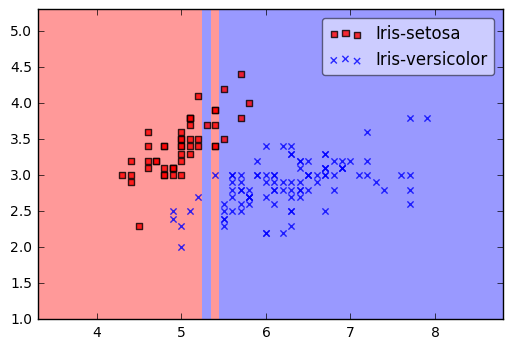

In [62]:
# %pdb
print " Plotting the Decision Surface of Training Set... "
t.plot_decision_regions(X[:,feat],Y,clf=dt, res=0.1, cycle_marker=True, legend=1)

In [52]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print " Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape   
print " Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape   
##
#Training Data Set Dimensions= (104, 4) Training True Class labels dimensions (104,)
#Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (104,)


 Training Data Set Dimensions= (104L, 4L) Training True Class labels dimensions (104L,)
 Test Data Set Dimensions= (45L, 4L) Test True Class labels dimensions (104L,)


In [29]:
print Ytrain

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-

In [64]:
# Lets train a Decision Tree Classifier on Petal Length and Width
feat=[2,3]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)

C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 104 but corresponding boolean dimension is 34
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 104 but corresponding boolean dimension is 70
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 31 but corresponding boolean dimension is 8
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 31 but corresponding boolean dimension is 23
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not m

In [65]:
#Lets test it on the set of unseen examples...
#print Xtest[:,feat]
pclasses=dt.predict(Xtest[:,feat])

In [66]:
print pclasses

"""
['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 
 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 
 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 
 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 
 'Iris-versicolor']
"""

['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor']


"\n['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', \n 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', \n 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', \n 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',\n 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',\n 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',\n 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', \n 'Iris-versicolor']\n"

Lets see how good we are doing...
==================

In [67]:
print Ytest

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor']


In [68]:
print pclasses==Ytest


[False False False False False False False False False False False False
 False False False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


In [69]:
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

30
Accuracy =  0.666666666667


 Plotting the Decision Surface of Training Set... 


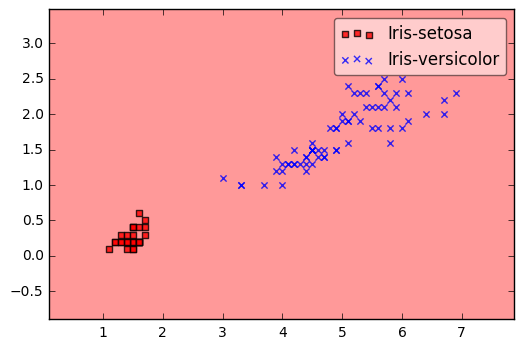

In [71]:
#Lets plot the decision surface
print " Plotting the Decision Surface of Training Set... "
t.plot_decision_regions(Xtrain[:,feat],Ytrain,clf=dt, res=0.02, cycle_marker=True, legend=1)

 Plotting the Decision Surface of Test Set... 


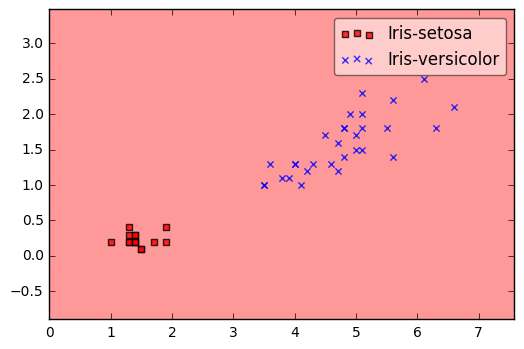

In [72]:
print " Plotting the Decision Surface of Test Set... "
t.plot_decision_regions(Xtest[:,feat],Ytest,clf=dt, res=0.02, cycle_marker=True, legend=1)

In [73]:
from nose.tools import assert_greater_equal
feat=[0,1]
dt=DecisionTree(0.70,5)
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
acc = np.sum(pclasses==Ytest)/float(Ytest.shape[0])
print acc
#assert_greater_equal(acc, 0.90)

0.666666666667


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 104 but corresponding boolean dimension is 34
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 104 but corresponding boolean dimension is 70
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 41 but corresponding boolean dimension is 15
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 41 but corresponding boolean dimension is 26
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not 

# Lets Train on all four features....

In [39]:
#Lets Train on all four features....

# Lets train a Decision Tree Classifier on Petal Length and Width
feat=[0, 1, 2, 3]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])
#45
#Accuracy =  1.0

#

30
Accuracy =  0.666666666667


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 104 but corresponding boolean dimension is 34
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 104 but corresponding boolean dimension is 70
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 58 but corresponding boolean dimension is 14
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 58 but corresponding boolean dimension is 44
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not 

# Lets Train on all four features and for all three classes....

In [40]:
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape
#Data Set Dimensions= (149, 4)  True Class labels dimensions (149,)

 Data Set Dimensions= (149L, 4L)  True Class labels dimensions (149L,)


In [41]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print " Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape   
print " Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape   
#Training Data Set Dimensions= (104, 4) Training True Class labels dimensions (104,)
#Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (104,)

 Training Data Set Dimensions= (104L, 4L) Training True Class labels dimensions (104L,)
 Test Data Set Dimensions= (45L, 4L) Test True Class labels dimensions (104L,)


In [42]:

feat=[0, 1, 2, 3]
dt=DecisionTree(0.95,5)
dt.root=None
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

#45
#Accuracy =  1.0

26
Accuracy =  0.577777777778


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 104 but corresponding boolean dimension is 34
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 104 but corresponding boolean dimension is 35
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 102 but corresponding boolean dimension is 34
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 102 but corresponding boolean dimension is 33
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did no

In [185]:
from nose.tools import assert_greater_equal

feat=[0, 1, 2, 3]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
acc = np.sum(pclasses==Ytest)/float(Ytest.shape[0])
assert_greater_equal(acc, 0.90)


X.shape:: (104L, 4L)


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:270: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 104 but corresponding boolean dimension is 34
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:270: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 104 but corresponding boolean dimension is 35
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:270: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 59 but corresponding boolean dimension is 16
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:270: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 59 but corresponding boolean dimension is 23
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:270: VisibleDeprecationWarning: boolean index did not 

AssertionError: 0.51111111111111107 not greater than or equal to 0.9

What can you conclude ?
====================
Please write your observation....



# Cross-Validation

Until now we have been splitting the dataset into a training and test set rather randomly and were reporting a rather artifical performance. Now we are going to test our system exhaustively by making use of k-fold [cross validation](http://en.wikipedia.org/wiki/Cross-validation_%28statistics%29). 

Now go and tune your hyper-parameters (purity, exthreshold) to opitmize the performance.

In [63]:
# Now lets cross validate for best paramters, and test the result...
# We will be training four different models on four different partitions of data set and 
# then will be reporting the mean accuracy of the four classifiers.

nfolds=4 # lets use four folds..
folds=t.generate_folds(X,Y,nfolds)
features=[0,1, 2, 3] # features to use for our system
#now lets train and test on these folds...

#Lets perform the grid search...
purity=np.linspace(0.85,0.97,13) # You can also search over depth as well....
nexamp=np.linspace(5,25,21)  

params=np.zeros((len(purity),len(nexamp)))
                   
for p in range(len(purity)):
    for n in range(len(nexamp)):
        totacc=[]
        for k in range(nfolds):
            dt=DecisionTree(purity[p],nexamp[n])
            dt.root=None
            dt.train(folds[k][0][:,features],folds[k][1])
            pclasses=dt.predict(folds[k][2][:,features])
            acc=np.sum(pclasses==folds[k][3])/float(folds[k][3].shape[0])
            print "[Info] Fold {} Accuracy = {}".format(k+1, acc)
            totacc.append(acc)
        params[p,n]=np.mean(totacc)
        print totacc, '\nPurity={}, Nexample-threshold={}, Mean Accuracy ={}'.format(purity[p],nexamp[n], np.mean(totacc))

Generating CV data for 2 classes
[Info] Fold 1 Accuracy = 0.540540540541
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 1.0
[Info] Fold 4 Accuracy = 0.972972972973
[0.54054054054054057, 0.67567567567567566, 1.0, 0.97297297297297303] 
Purity=0.85, Nexample-threshold=5.0, Mean Accuracy =0.797297297297
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.837837837838
[Info] Fold 3 Accuracy = 0.648648648649
[Info] Fold 4 Accuracy = 0.675675675676
[0.67567567567567566, 0.83783783783783783, 0.64864864864864868, 0.67567567567567566] 
Purity=0.85, Nexample-threshold=6.0, Mean Accuracy =0.709459459459


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 112 but corresponding boolean dimension is 37
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 112 but corresponding boolean dimension is 75
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 47 but corresponding boolean dimension is 16
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 47 but corresponding boolean dimension is 31
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not 

[Info] Fold 1 Accuracy = 0.810810810811
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.675675675676
[0.81081081081081086, 0.67567567567567566, 0.67567567567567566, 0.67567567567567566] 
Purity=0.85, Nexample-threshold=7.0, Mean Accuracy =0.709459459459
[Info] Fold 1 Accuracy = 0.810810810811
[Info] Fold 2 Accuracy = 0.351351351351
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.675675675676
[0.81081081081081086, 0.35135135135135137, 0.67567567567567566, 0.67567567567567566] 
Purity=0.85, Nexample-threshold=8.0, Mean Accuracy =0.628378378378


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 80 but corresponding boolean dimension is 25
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 80 but corresponding boolean dimension is 55
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 28 but corresponding boolean dimension is 6
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 28 but corresponding boolean dimension is 22
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not mat

[Info] Fold 1 Accuracy = 0.648648648649
[Info] Fold 2 Accuracy = 0.72972972973
[Info] Fold 3 Accuracy = 0.837837837838
[Info] Fold 4 Accuracy = 0.72972972973
[0.64864864864864868, 0.72972972972972971, 0.83783783783783783, 0.72972972972972971] 
Purity=0.85, Nexample-threshold=9.0, Mean Accuracy =0.736486486486
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.783783783784
[Info] Fold 3 Accuracy = 0.756756756757


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 101 but corresponding boolean dimension is 34
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 101 but corresponding boolean dimension is 67
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 95 but corresponding boolean dimension is 30
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 95 but corresponding boolean dimension is 65
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not 

[Info] Fold 4 Accuracy = 0.675675675676
[0.67567567567567566, 0.78378378378378377, 0.7567567567567568, 0.67567567567567566] 
Purity=0.85, Nexample-threshold=10.0, Mean Accuracy =0.722972972973
[Info] Fold 1 Accuracy = 0.810810810811
[Info] Fold 2 Accuracy = 0.972972972973
[Info] Fold 3 Accuracy = 0.675675675676


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 37 but corresponding boolean dimension is 10
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 37 but corresponding boolean dimension is 27
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 7
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 12
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not mat

[Info] Fold 4 Accuracy = 0.675675675676
[0.81081081081081086, 0.97297297297297303, 0.67567567567567566, 0.67567567567567566] 
Purity=0.85, Nexample-threshold=11.0, Mean Accuracy =0.783783783784
[Info] Fold 1 Accuracy = 0.756756756757
[Info] Fold 2 Accuracy = 0.945945945946
[Info] Fold 3 Accuracy = 0.891891891892
[Info] Fold 4 Accuracy = 0.675675675676
[0.7567567567567568, 0.94594594594594594, 0.89189189189189189, 0.67567567567567566] 
Purity=0.85, Nexample-threshold=12.0, Mean Accuracy =0.817567567568


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 48 but corresponding boolean dimension is 14
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 48 but corresponding boolean dimension is 34
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 32 but corresponding boolean dimension is 9
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 32 but corresponding boolean dimension is 23
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not mat

[Info] Fold 1 Accuracy = 0.783783783784
[Info] Fold 2 Accuracy = 0.945945945946
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 1.0
[0.78378378378378377, 0.94594594594594594, 0.67567567567567566, 1.0] 
Purity=0.85, Nexample-threshold=13.0, Mean Accuracy =0.851351351351
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.783783783784


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 28 but corresponding boolean dimension is 10
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 28 but corresponding boolean dimension is 18
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 25 but corresponding boolean dimension is 9
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 25 but corresponding boolean dimension is 16
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not mat

[Info] Fold 4 Accuracy = 0.675675675676
[0.67567567567567566, 0.67567567567567566, 0.78378378378378377, 0.67567567567567566] 
Purity=0.85, Nexample-threshold=14.0, Mean Accuracy =0.702702702703
[Info] Fold 1 Accuracy = 0.540540540541
[Info] Fold 2 Accuracy = 0.945945945946
[Info] Fold 3 Accuracy = 0.351351351351


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 20 but corresponding boolean dimension is 12
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 35 but corresponding boolean dimension is 15
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 35 but corresponding boolean dimension is 20
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 77 but corresponding boolean dimension is 22
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 4 Accuracy = 0.675675675676
[0.54054054054054057, 0.94594594594594594, 0.35135135135135137, 0.67567567567567566] 
Purity=0.85, Nexample-threshold=15.0, Mean Accuracy =0.628378378378
[Info] Fold 1 Accuracy = 0.648648648649
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.648648648649
[Info] Fold 4 Accuracy = 0.72972972973
[0.64864864864864868, 0.67567567567567566, 0.64864864864864868, 0.72972972972972971] 
Purity=0.85, Nexample-threshold=16.0, Mean Accuracy =0.675675675676
[Info] Fold 1 Accuracy = 0.648648648649


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 77 but corresponding boolean dimension is 29
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 77 but corresponding boolean dimension is 48
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 72 but corresponding boolean dimension is 27
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 72 but corresponding boolean dimension is 45
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.675675675676
[0.64864864864864868, 0.67567567567567566, 0.67567567567567566, 0.67567567567567566] 
Purity=0.85, Nexample-threshold=17.0, Mean Accuracy =0.668918918919
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.648648648649
[Info] Fold 3 Accuracy = 0.675675675676


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 40 but corresponding boolean dimension is 12
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 40 but corresponding boolean dimension is 28
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 105 but corresponding boolean dimension is 36
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 105 but corresponding boolean dimension is 69
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not 

[Info] Fold 4 Accuracy = 0.675675675676
[0.67567567567567566, 0.64864864864864868, 0.67567567567567566, 0.67567567567567566] 
Purity=0.85, Nexample-threshold=18.0, Mean Accuracy =0.668918918919
[Info] Fold 1 Accuracy = 0.891891891892
[Info] Fold 2 Accuracy = 0.72972972973
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.594594594595
[0.89189189189189189, 0.72972972972972971, 0.67567567567567566, 0.59459459459459463] 
Purity=0.85, Nexample-threshold=19.0, Mean Accuracy =0.722972972973
[Info] Fold 1 Accuracy = 0.72972972973
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.675675675676


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 86 but corresponding boolean dimension is 29
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 86 but corresponding boolean dimension is 57
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 30 but corresponding boolean dimension is 14
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 30 but corresponding boolean dimension is 16
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 4 Accuracy = 0.810810810811
[0.72972972972972971, 0.67567567567567566, 0.67567567567567566, 0.81081081081081086] 
Purity=0.85, Nexample-threshold=20.0, Mean Accuracy =0.722972972973
[Info] Fold 1 Accuracy = 0.540540540541
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.783783783784
[Info] Fold 4 Accuracy = 0.648648648649
[0.54054054054054057, 0.67567567567567566, 0.78378378378378377, 0.64864864864864868] 
Purity=0.85, Nexample-threshold=21.0, Mean Accuracy =0.662162162162


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 56 but corresponding boolean dimension is 18
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 56 but corresponding boolean dimension is 38
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 46 but corresponding boolean dimension is 14
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 46 but corresponding boolean dimension is 32
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.648648648649
[0.67567567567567566, 0.67567567567567566, 0.67567567567567566, 0.64864864864864868] 
Purity=0.85, Nexample-threshold=22.0, Mean Accuracy =0.668918918919
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.540540540541


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 53 but corresponding boolean dimension is 17
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 53 but corresponding boolean dimension is 36
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 74 but corresponding boolean dimension is 24
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 74 but corresponding boolean dimension is 50
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.837837837838
[0.67567567567567566, 0.54054054054054057, 0.67567567567567566, 0.83783783783783783] 
Purity=0.85, Nexample-threshold=23.0, Mean Accuracy =0.682432432432
[Info] Fold 1 Accuracy = 0.432432432432
[Info] Fold 2 Accuracy = 0.162162162162
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.675675675676
[0.43243243243243246, 0.16216216216216217, 0.67567567567567566, 0.67567567567567566] 
Purity=0.85, Nexample-threshold=24.0, Mean Accuracy =0.486486486486
[Info] Fold 1 Accuracy = 0.675675675676


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 38 but corresponding boolean dimension is 12
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 38 but corresponding boolean dimension is 26
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 74 but corresponding boolean dimension is 25
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 74 but corresponding boolean dimension is 49
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 2 Accuracy = 0.621621621622
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.675675675676
[0.67567567567567566, 0.6216216216216216, 0.67567567567567566, 0.67567567567567566] 
Purity=0.85, Nexample-threshold=25.0, Mean Accuracy =0.662162162162
[Info] Fold 1 Accuracy = 0.702702702703
[Info] Fold 2 Accuracy = 0.648648648649
[Info] Fold 3 Accuracy = 1.0
[Info] Fold 4 Accuracy = 0.891891891892
[0.70270270270270274, 0.64864864864864868, 1.0, 0.89189189189189189] 
Purity=0.86, Nexample-threshold=5.0, Mean Accuracy =0.810810810811
[Info] Fold 1 Accuracy = 0.756756756757


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 63 but corresponding boolean dimension is 17
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 63 but corresponding boolean dimension is 46
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 17 but corresponding boolean dimension is 3
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 17 but corresponding boolean dimension is 14
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not mat

[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.756756756757
[Info] Fold 4 Accuracy = 0.675675675676
[0.7567567567567568, 0.67567567567567566, 0.7567567567567568, 0.67567567567567566] 
Purity=0.86, Nexample-threshold=6.0, Mean Accuracy =0.716216216216
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.783783783784
[Info] Fold 4 Accuracy = 0.675675675676
[0.67567567567567566, 0.67567567567567566, 0.78378378378378377, 0.67567567567567566] 
Purity=0.86, Nexample-threshold=7.0, Mean Accuracy =0.702702702703


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 41 but corresponding boolean dimension is 17
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 41 but corresponding boolean dimension is 24
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 64 but corresponding boolean dimension is 19
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 64 but corresponding boolean dimension is 45
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 1 Accuracy = 0.972972972973
[Info] Fold 2 Accuracy = 0.810810810811
[Info] Fold 3 Accuracy = 1.0
[Info] Fold 4 Accuracy = 0.675675675676
[0.97297297297297303, 0.81081081081081086, 1.0, 0.67567567567567566] 
Purity=0.86, Nexample-threshold=8.0, Mean Accuracy =0.864864864865
[Info] Fold 1 Accuracy = 0.891891891892
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.675675675676
[0.89189189189189189, 0.67567567567567566, 0.67567567567567566, 0.67567567567567566] 
Purity=0.86, Nexample-threshold=9.0, Mean Accuracy =0.72972972973
[Info] Fold 1 Accuracy = 0.621621621622


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 65 but corresponding boolean dimension is 28
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 65 but corresponding boolean dimension is 37
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 62 but corresponding boolean dimension is 26
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 62 but corresponding boolean dimension is 36
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.918918918919
[Info] Fold 4 Accuracy = 0.837837837838
[0.6216216216216216, 0.67567567567567566, 0.91891891891891897, 0.83783783783783783] 
Purity=0.86, Nexample-threshold=10.0, Mean Accuracy =0.763513513514
[Info] Fold 1 Accuracy = 0.378378378378
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.648648648649


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 52 but corresponding boolean dimension is 17
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 52 but corresponding boolean dimension is 35
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 34 but corresponding boolean dimension is 10
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 34 but corresponding boolean dimension is 24
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 4 Accuracy = 0.0540540540541
[0.3783783783783784, 0.67567567567567566, 0.64864864864864868, 0.054054054054054057] 
Purity=0.86, Nexample-threshold=11.0, Mean Accuracy =0.439189189189
[Info] Fold 1 Accuracy = 0.648648648649
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.702702702703
[Info] Fold 4 Accuracy = 0.675675675676
[0.64864864864864868, 0.67567567567567566, 0.70270270270270274, 0.67567567567567566] 
Purity=0.86, Nexample-threshold=12.0, Mean Accuracy =0.675675675676
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.648648648649


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 68 but corresponding boolean dimension is 20
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 68 but corresponding boolean dimension is 48
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 59 but corresponding boolean dimension is 18
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 59 but corresponding boolean dimension is 41
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 3 Accuracy = 0.702702702703
[Info] Fold 4 Accuracy = 0.72972972973
[0.67567567567567566, 0.64864864864864868, 0.70270270270270274, 0.72972972972972971] 
Purity=0.86, Nexample-threshold=13.0, Mean Accuracy =0.689189189189
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.405405405405
[0.67567567567567566, 0.67567567567567566, 0.67567567567567566, 0.40540540540540543] 
Purity=0.86, Nexample-threshold=14.0, Mean Accuracy =0.608108108108


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 29 but corresponding boolean dimension is 11
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 29 but corresponding boolean dimension is 18
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 32 but corresponding boolean dimension is 7
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 32 but corresponding boolean dimension is 25
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not mat

[Info] Fold 1 Accuracy = 0.702702702703
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.702702702703
[Info] Fold 4 Accuracy = 0.675675675676
[0.70270270270270274, 0.67567567567567566, 0.70270270270270274, 0.67567567567567566] 
Purity=0.86, Nexample-threshold=15.0, Mean Accuracy =0.689189189189
[Info] Fold 1 Accuracy = 0.621621621622
[Info] Fold 2 Accuracy = 0.675675675676


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 76 but corresponding boolean dimension is 25
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 76 but corresponding boolean dimension is 51
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 53 but corresponding boolean dimension is 15
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 53 but corresponding boolean dimension is 38
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.675675675676
[0.6216216216216216, 0.67567567567567566, 0.67567567567567566, 0.67567567567567566] 
Purity=0.86, Nexample-threshold=16.0, Mean Accuracy =0.662162162162
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.513513513514
[0.67567567567567566, 0.67567567567567566, 0.67567567567567566, 0.51351351351351349] 
Purity=0.86, Nexample-threshold=17.0, Mean Accuracy =0.635135135135


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 52 but corresponding boolean dimension is 18
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 52 but corresponding boolean dimension is 34
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 55 but corresponding boolean dimension is 20
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 55 but corresponding boolean dimension is 35
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 1 Accuracy = 0.594594594595
[Info] Fold 2 Accuracy = 1.0
[Info] Fold 3 Accuracy = 0.756756756757
[Info] Fold 4 Accuracy = 0.675675675676
[0.59459459459459463, 1.0, 0.7567567567567568, 0.67567567567567566] 
Purity=0.86, Nexample-threshold=18.0, Mean Accuracy =0.756756756757
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.891891891892


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21 but corresponding boolean dimension is 3
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21 but corresponding boolean dimension is 18
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 75 but corresponding boolean dimension is 23
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 75 but corresponding boolean dimension is 52
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not mat

[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.351351351351
[0.67567567567567566, 0.89189189189189189, 0.67567567567567566, 0.35135135135135137] 
Purity=0.86, Nexample-threshold=19.0, Mean Accuracy =0.648648648649
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.594594594595
[Info] Fold 4 Accuracy = 0.675675675676
[0.67567567567567566, 0.67567567567567566, 0.59459459459459463, 0.67567567567567566] 
Purity=0.86, Nexample-threshold=20.0, Mean Accuracy =0.655405405405


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 104 but corresponding boolean dimension is 36
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 104 but corresponding boolean dimension is 68
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 99 but corresponding boolean dimension is 36
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 99 but corresponding boolean dimension is 63
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not 

[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.783783783784
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.675675675676
[0.67567567567567566, 0.78378378378378377, 0.67567567567567566, 0.67567567567567566] 
Purity=0.86, Nexample-threshold=21.0, Mean Accuracy =0.702702702703
[Info] Fold 1 Accuracy = 0.594594594595
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.810810810811
[Info] Fold 4 Accuracy = 0.675675675676
[0.59459459459459463, 0.67567567567567566, 0.81081081081081086, 0.67567567567567566] 
Purity=0.86, Nexample-threshold=22.0, Mean Accuracy =0.689189189189
[Info] Fold 1 Accuracy = 1.0


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 74 but corresponding boolean dimension is 21
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 74 but corresponding boolean dimension is 53
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 71 but corresponding boolean dimension is 19
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 71 but corresponding boolean dimension is 52
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 1.0
[Info] Fold 4 Accuracy = 0.540540540541
[1.0, 0.67567567567567566, 1.0, 0.54054054054054057] 
Purity=0.86, Nexample-threshold=23.0, Mean Accuracy =0.804054054054
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.621621621622
[Info] Fold 3 Accuracy = 0.675675675676


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 86 but corresponding boolean dimension is 61
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 60 but corresponding boolean dimension is 19
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 60 but corresponding boolean dimension is 41
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 73 but corresponding boolean dimension is 21
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 4 Accuracy = 0.675675675676
[0.67567567567567566, 0.6216216216216216, 0.67567567567567566, 0.67567567567567566] 
Purity=0.86, Nexample-threshold=24.0, Mean Accuracy =0.662162162162
[Info] Fold 1 Accuracy = 0.972972972973
[Info] Fold 2 Accuracy = 0.648648648649
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.702702702703
[0.97297297297297303, 0.64864864864864868, 0.67567567567567566, 0.70270270270270274] 
Purity=0.86, Nexample-threshold=25.0, Mean Accuracy =0.75
[Info] Fold 1 Accuracy = 0.702702702703
[Info] Fold 2 Accuracy = 0.72972972973


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 35 but corresponding boolean dimension is 10
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 35 but corresponding boolean dimension is 25
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6 but corresponding boolean dimension is 1
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6 but corresponding boolean dimension is 5
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match 

[Info] Fold 3 Accuracy = 0.756756756757
[Info] Fold 4 Accuracy = 0.675675675676
[0.70270270270270274, 0.72972972972972971, 0.7567567567567568, 0.67567567567567566] 
Purity=0.87, Nexample-threshold=5.0, Mean Accuracy =0.716216216216
[Info] Fold 1 Accuracy = 0.837837837838
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.756756756757
[Info] Fold 4 Accuracy = 0.972972972973
[0.83783783783783783, 0.67567567567567566, 0.7567567567567568, 0.97297297297297303] 
Purity=0.87, Nexample-threshold=6.0, Mean Accuracy =0.810810810811
[Info] Fold 1 Accuracy = 0.675675675676


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 16 but corresponding boolean dimension is 3
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 16 but corresponding boolean dimension is 13
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 86 but corresponding boolean dimension is 27
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 86 but corresponding boolean dimension is 59


[Info] Fold 2 Accuracy = 0.864864864865
[Info] Fold 3 Accuracy = 0.810810810811
[Info] Fold 4 Accuracy = 0.675675675676
[0.67567567567567566, 0.86486486486486491, 0.81081081081081086, 0.67567567567567566] 
Purity=0.87, Nexample-threshold=7.0, Mean Accuracy =0.756756756757
[Info] Fold 1 Accuracy = 0.621621621622
[Info] Fold 2 Accuracy = 1.0
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.918918918919
[0.6216216216216216, 1.0, 0.67567567567567566, 0.91891891891891897] 
Purity=0.87, Nexample-threshold=8.0, Mean Accuracy =0.804054054054
[Info] Fold 1 Accuracy = 0.702702702703
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.648648648649
[Info] Fold 4 Accuracy = 0.972972972973
[0.70270270270270274, 0.67567567567567566, 0.64864864864864868, 0.97297297297297303] 
Purity=0.87, Nexample-threshold=9.0, Mean Accuracy =0.75
[Info] Fold 1 Accuracy = 0.378378378378
[Info] Fold 2 Accuracy = 0.72972972973
[Info] Fold 3 Accuracy = 0.756756756757
[Info] Fold 4 Accura

C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 44 but corresponding boolean dimension is 13
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 44 but corresponding boolean dimension is 31
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 47 but corresponding boolean dimension is 14
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 47 but corresponding boolean dimension is 33
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 2 Accuracy = 0.837837837838
[Info] Fold 3 Accuracy = 0.648648648649
[Info] Fold 4 Accuracy = 0.432432432432
[0.83783783783783783, 0.83783783783783783, 0.64864864864864868, 0.43243243243243246] 
Purity=0.87, Nexample-threshold=11.0, Mean Accuracy =0.689189189189
[Info] Fold 1 Accuracy = 0.702702702703
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.675675675676


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 65 but corresponding boolean dimension is 23
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 65 but corresponding boolean dimension is 42
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 67 but corresponding boolean dimension is 24
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 67 but corresponding boolean dimension is 43
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 4 Accuracy = 0.72972972973
[0.70270270270270274, 0.67567567567567566, 0.67567567567567566, 0.72972972972972971] 
Purity=0.87, Nexample-threshold=12.0, Mean Accuracy =0.695945945946
[Info] Fold 1 Accuracy = 0.756756756757
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.675675675676
[0.7567567567567568, 0.67567567567567566, 0.67567567567567566, 0.67567567567567566] 
Purity=0.87, Nexample-threshold=13.0, Mean Accuracy =0.695945945946
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.459459459459


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 98 but corresponding boolean dimension is 31
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 98 but corresponding boolean dimension is 67
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 81 but corresponding boolean dimension is 26
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 81 but corresponding boolean dimension is 55
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 4 Accuracy = 0.864864864865
[0.67567567567567566, 0.67567567567567566, 0.45945945945945948, 0.86486486486486491] 
Purity=0.87, Nexample-threshold=14.0, Mean Accuracy =0.668918918919
[Info] Fold 1 Accuracy = 0.621621621622
[Info] Fold 2 Accuracy = 0.648648648649
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.972972972973
[0.6216216216216216, 0.64864864864864868, 0.67567567567567566, 0.97297297297297303] 
Purity=0.87, Nexample-threshold=15.0, Mean Accuracy =0.72972972973
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.675675675676


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 83 but corresponding boolean dimension is 29
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 83 but corresponding boolean dimension is 54
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 32 but corresponding boolean dimension is 17
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 32 but corresponding boolean dimension is 15
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 3 Accuracy = 0.324324324324
[Info] Fold 4 Accuracy = 0.675675675676
[0.67567567567567566, 0.67567567567567566, 0.32432432432432434, 0.67567567567567566] 
Purity=0.87, Nexample-threshold=16.0, Mean Accuracy =0.587837837838
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.756756756757
[0.67567567567567566, 0.67567567567567566, 0.67567567567567566, 0.7567567567567568] 
Purity=0.87, Nexample-threshold=17.0, Mean Accuracy =0.695945945946


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 58 but corresponding boolean dimension is 19
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 58 but corresponding boolean dimension is 39
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 97 but corresponding boolean dimension is 34
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 97 but corresponding boolean dimension is 63
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 1 Accuracy = 0.72972972973
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.810810810811
[0.72972972972972971, 0.67567567567567566, 0.67567567567567566, 0.81081081081081086] 
Purity=0.87, Nexample-threshold=18.0, Mean Accuracy =0.722972972973
[Info] Fold 1 Accuracy = 0.810810810811
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.621621621622


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 46 but corresponding boolean dimension is 21
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 46 but corresponding boolean dimension is 25
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 47 but corresponding boolean dimension is 15
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 47 but corresponding boolean dimension is 32
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 4 Accuracy = 0.459459459459
[0.81081081081081086, 0.67567567567567566, 0.6216216216216216, 0.45945945945945948] 
Purity=0.87, Nexample-threshold=19.0, Mean Accuracy =0.641891891892
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.648648648649
[0.67567567567567566, 0.67567567567567566, 0.67567567567567566, 0.64864864864864868] 
Purity=0.87, Nexample-threshold=20.0, Mean Accuracy =0.668918918919
[Info] Fold 1 Accuracy = 0.675675675676


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 42 but corresponding boolean dimension is 13
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 42 but corresponding boolean dimension is 29
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 52 but corresponding boolean dimension is 20
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 52 but corresponding boolean dimension is 32
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not ma

[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.243243243243
[Info] Fold 4 Accuracy = 0.648648648649
[0.67567567567567566, 0.67567567567567566, 0.24324324324324326, 0.64864864864864868] 
Purity=0.87, Nexample-threshold=21.0, Mean Accuracy =0.560810810811
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.72972972973
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.675675675676
[0.67567567567567566, 0.72972972972972971, 0.67567567567567566, 0.67567567567567566] 
Purity=0.87, Nexample-threshold=22.0, Mean Accuracy =0.689189189189


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 71 but corresponding boolean dimension is 27
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 71 but corresponding boolean dimension is 44
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 105 but corresponding boolean dimension is 34
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 105 but corresponding boolean dimension is 71
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not 

[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.756756756757
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.675675675676
[0.67567567567567566, 0.7567567567567568, 0.67567567567567566, 0.67567567567567566] 
Purity=0.87, Nexample-threshold=23.0, Mean Accuracy =0.695945945946
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.945945945946


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 57 but corresponding boolean dimension is 17
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 57 but corresponding boolean dimension is 40
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 106 but corresponding boolean dimension is 33
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 106 but corresponding boolean dimension is 73
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not 

[Info] Fold 3 Accuracy = 0.756756756757
[Info] Fold 4 Accuracy = 0.540540540541
[0.67567567567567566, 0.94594594594594594, 0.7567567567567568, 0.54054054054054057] 
Purity=0.87, Nexample-threshold=24.0, Mean Accuracy =0.72972972973
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.324324324324
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.675675675676
[0.67567567567567566, 0.32432432432432434, 0.67567567567567566, 0.67567567567567566] 
Purity=0.87, Nexample-threshold=25.0, Mean Accuracy =0.587837837838
[Info] Fold 1 Accuracy = 0.648648648649
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.702702702703
[Info] Fold 4 Accuracy = 0.675675675676
[0.64864864864864868, 0.67567567567567566, 0.70270270270270274, 0.67567567567567566] 
Purity=0.88, Nexample-threshold=5.0, Mean Accuracy =0.675675675676
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.945945945946
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accurac

C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 2
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 12
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 47 but corresponding boolean dimension is 19
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 47 but corresponding boolean dimension is 28
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not mat

[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.621621621622
[0.67567567567567566, 0.67567567567567566, 0.67567567567567566, 0.6216216216216216] 
Purity=0.88, Nexample-threshold=7.0, Mean Accuracy =0.662162162162
[Info] Fold 1 Accuracy = 0.486486486486
[Info] Fold 2 Accuracy = 0.675675675676
[Info] Fold 3 Accuracy = 0.675675675676
[Info] Fold 4 Accuracy = 0.72972972973
[0.48648648648648651, 0.67567567567567566, 0.67567567567567566, 0.72972972972972971] 
Purity=0.88, Nexample-threshold=8.0, Mean Accuracy =0.641891891892
[Info] Fold 1 Accuracy = 0.675675675676
[Info] Fold 2 Accuracy = 0.648648648649
[Info] Fold 3 Accuracy = 0.594594594595


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 71 but corresponding boolean dimension is 21
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 71 but corresponding boolean dimension is 50
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 101 but corresponding boolean dimension is 36
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:332: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 101 but corresponding boolean dimension is 65


KeyboardInterrupt: 

In [187]:
np.save('dt-cv',params)

In [188]:
print params

[[ 0.375       0.27083333  0.48611111  0.07638889  0.34722222  0.5625
   0.34027778  0.31944444  0.40277778  0.34722222  0.28472222  0.40972222
   0.34027778  0.28472222  0.375       0.45138889  0.38194444  0.45833333
   0.20833333  0.375       0.5       ]
 [ 0.53472222  0.39583333  0.27083333  0.3125      0.625       0.40277778
   0.125       0.33333333  0.33333333  0.15277778  0.34027778  0.375
   0.36111111  0.27777778  0.51388889  0.36111111  0.32638889  0.45833333
   0.40972222  0.20833333  0.43055556]
 [ 0.38888889  0.34027778  0.11111111  0.38194444  0.40277778  0.34722222
   0.25        0.29861111  0.38194444  0.32638889  0.35416667  0.38194444
   0.40277778  0.20833333  0.31944444  0.375       0.25694444  0.34027778
   0.29861111  0.28472222  0.56944444]
 [ 0.38888889  0.20833333  0.24305556  0.22916667  0.45138889  0.26388889
   0.27777778  0.375       0.29166667  0.40277778  0.43055556  0.35416667
   0.27083333  0.3125      0.34027778  0.46527778  0.3125      0.40277778
   0

In [189]:
print params.shape
#(13, 21)

(13L, 21L)


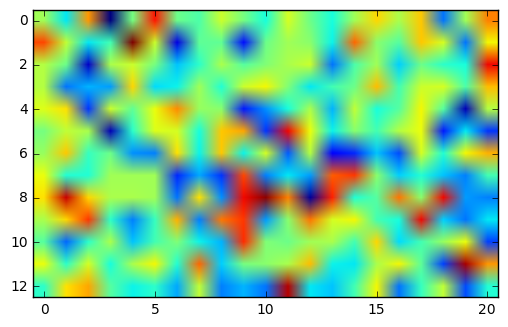

In [190]:
plt.imshow(params) # displayc the accuracy as 2D image...

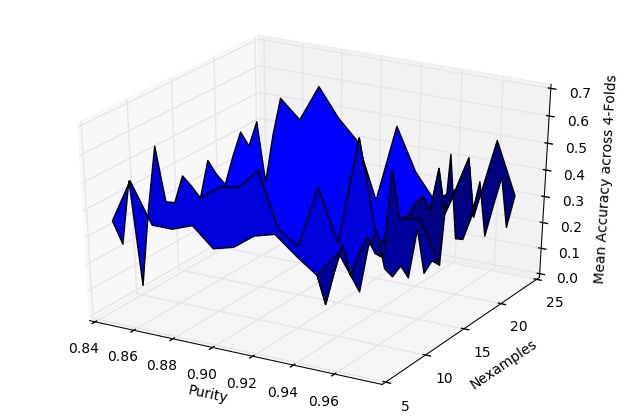

In [191]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
tX, tY = np.meshgrid(purity, nexamp)
ax.plot_surface(tX,tY,params.T)
ax.set_xlabel('Purity')
ax.set_ylabel('Nexamples')
ax.set_zlabel('Mean Accuracy across {}-Folds'.format(nfolds))
# ax.scatter3D(data['SepalLength'],data['PetalLength'],data['PetalWidth'])
#(params,ax,'Purity','Example-Threshold','Mean-Accuracy')

In [192]:
print params.shape, tX.shape, tY.shape
#(13, 21) (21, 13) (21, 13)


(13L, 21L) (21L, 13L) (21L, 13L)


In [193]:
#print the row and column  index of m
#single line code
ridx,cidx= np.unravel_index(np.argmax(params), params.shape)

# simple step-wise code

cidx=np.argmax(params.max(axis=0))
ridx=np.argmax(params[:,cidx])
print ridx, cidx
#10 0

1 4


In [194]:
print 'CV Best Parameters are, purity={}, nexamp={}, mean accuracy={}'.format(purity[ridx],nexamp[cidx],params[ridx,cidx])

CV Best Parameters are, purity=0.86, nexamp=9.0, mean accuracy=0.625


In [218]:
print purity[ridx],nexamp[cidx]
dt=DecisionTree(purity[ridx],nexamp[cidx])
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])
#0.95 5.0
#45
#Accuracy =  1.0

0.86 9.0
X.shape:: (104L, 4L)
19
Accuracy =  0.422222222222


C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:270: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 104 but corresponding boolean dimension is 34
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:270: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 104 but corresponding boolean dimension is 35
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:270: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 40 but corresponding boolean dimension is 11
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:270: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 40 but corresponding boolean dimension is 17
C:\Users\Shahwaiz\Anaconda2\lib\site-packages\ipykernel\__main__.py:270: VisibleDeprecationWarning: boolean index did not 

In [196]:
print dt.find_depth()

6


In [67]:
print dt

HERE

        C(class=Iris-virginica,Purity=0.897435897436)
    I(Fidx=-1,Score=0.398024878084,Split=[2, 4.75])
        C(class=Iris-versicolor,Purity=1.0)
I(Fidx=-1,Score=0.666932222158,Split=[3, 0.75])
    C(class=Iris-setosa,Purity=1.0)
